![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1327132%2F0c83aef015cef72a1c6ef0bdb18937f3%2Fcolumns%20meaning%20small.png?generation=1609671531255584&alt=media)

In [233]:
# basic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display

from IPython.display import display
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')

In [234]:
# load data

data=pd.read_csv('../input/marketing-data/marketing_data.csv')

# Section 01: Exploratory Data Analysis

### question

1. Are there any null values or outliers? How will you wrangle/handle them?
2. Are there any variables that warrant transformations?  
3. Are there any useful variables that you can engineer with the given data?
4. Do you notice any patterns or anomalies in the data? Can you plot them?

### answer

1. income 24 missing. and year_birth outliers. income fill nan to median and outlier slice.  
2. income remove percuation and change to float. also, dt_customer date format change. 
3. num_ , mnt_, cmp_ intergrated total. for remarkable insights.  
4. yes.    


* in products, wine meat exceptionally high. 
* i don't know marketing in details, but most of campaigns seems not-effective. 
* loyal customer ids : 1991, 7348, 5371, 4073 ... with wordcloud.

#### take eyes on data infos

Income - missing 24. and have punctuation.   
Dt_Customer - date format  

In [235]:
def datainfo(df):
    return pd.DataFrame([(col,df[col].nunique(),df[col].dtype,df[col].isna().sum(),
                          df[col].unique()[:5]) for col in df.columns],
                       columns=['name','nunique','dtype','missing','value :5'])

datainfo(data)

,name,nunique,dtype,missing,value :5
0,ID,2240,int64,0,"[1826, 1, 10476, 1386, 5371]"
1,Year_Birth,59,int64,0,"[1970, 1961, 1958, 1967, 1989]"
2,Education,5,object,0,"[Graduation, PhD, 2n Cycle, Master, Basic]"
3,Marital_Status,8,object,0,"[Divorced, Single, Married, Together, Widow]"
4,Income,1974,object,24,"[$84,835.00 , $57,091.00 , $67,267.00 , $32,47..."
5,Kidhome,3,int64,0,"[0, 1, 2]"
6,Teenhome,3,int64,0,"[0, 1, 2]"
7,Dt_Customer,663,object,0,"[6/16/14, 6/15/14, 5/13/14, 5/11/14, 4/8/14]"
8,Recency,100,int64,0,"[0, 1, 2, 3, 4]"
9,MntWines,776,int64,0,"[189, 464, 134, 10, 6]"


In [236]:
# income have 'space'

data.columns=[col.strip() for col in data.columns]

# Income punctuation

data['Income']=data['Income'].str.replace(r'[$,\. ]','')

# fill with median & change dtype object to float

data['Income']=data['Income'].fillna(data['Income'].median()).astype(float)

# change to datetime

data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format='%m/%d/%y')

#### take eyes on data

Year_Birth - outliers. min birth 1893? it could be. but need little slice.  
wine and meat products - big standard deviation. first watch.  

_reference_

https://www.kaggle.com/jackdaoud/marketing-data/discussion/208329 - data info
https://www.crunchbase.com/organization/ifood - ifood company info

it says Founded Date : May 15, 2011.

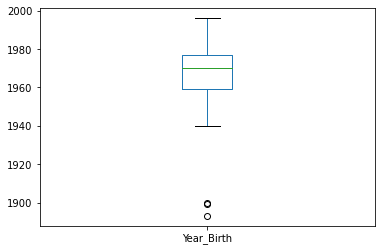

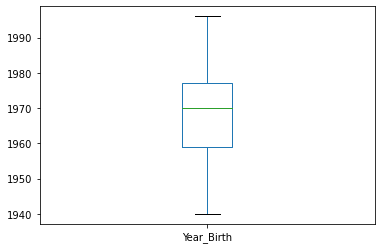

In [237]:
# data.select_dtypes(include='number').describe().iloc[:,:10]

# simple plot
# before

plt.figure()
data['Year_Birth'].plot(kind='box');
plt.show()

# slice

data=data.loc[data.Year_Birth>1920]

# after

plt.figure()
data['Year_Birth'].plot(kind='box');
plt.show()

#### take eyes on data

Cmp_num & response - total campaign. -> with id. Working well campaign.  
num purchases - total purchases. -> Loyal customers.  
Mnt products - total products -> famous products.  

In [238]:
campaign_cols=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
               'AcceptedCmp1','AcceptedCmp2','Response']

purchases_cols=['NumDealsPurchases','NumWebPurchases',
                'NumCatalogPurchases','NumStorePurchases']

amount_cols=['MntWines','MntFruits','MntMeatProducts','MntFishProducts',
             'MntSweetProducts','MntGoldProds']

# feature engineering

data['total_campaign']=data[campaign_cols].sum(axis=1)
data['total_purchases']=data[purchases_cols].sum(axis=1)
data['total_amount']=data[amount_cols].sum(axis=1)

#### inference 

i think campaign is not effective. one of campaign many.   
and i wonder what kind of campaign effective.

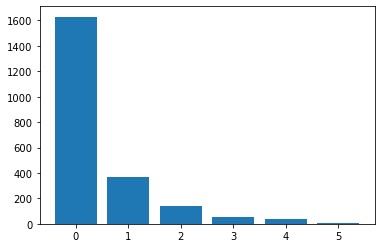

In [239]:
# no campaign (0) many.

inference=data[['ID','total_campaign','total_purchases','total_amount']]

plt.bar(x=range(6),height=inference['total_campaign'].value_counts());

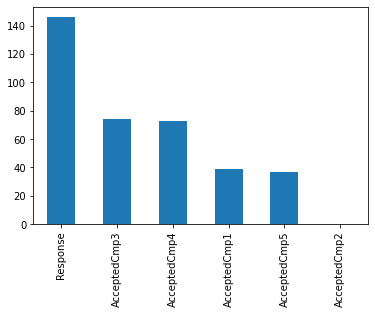

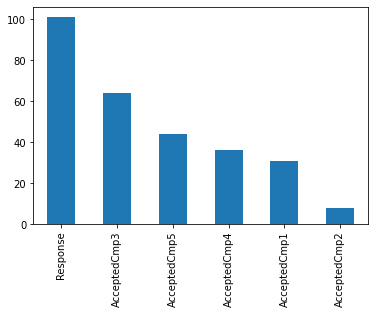

In [240]:
# response - last campaign good.
plt.figure()
data.loc[data['total_campaign']==1,['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
               'AcceptedCmp1','AcceptedCmp2','Response']].sum(axis=0).sort_values(ascending=False).plot(kind='bar');

# in two, response and campaign3 famous.
plt.figure()
data.loc[data['total_campaign']==2,['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
               'AcceptedCmp1','AcceptedCmp2','Response']].sum(axis=0).sort_values(ascending=False).plot(kind='bar');

#### take eyes on data

each campaign high. but almost campaign weak.  

In [241]:
# apriori - campaign.
from mlxtend.frequent_patterns import apriori

In [242]:
cmp=data[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
          'AcceptedCmp1','AcceptedCmp2','Response']]

cmp_freq=apriori(cmp,min_support=0.01,use_colnames=True)
cmp_freq.sort_values(by='support',ascending=False)

,support,itemsets
5,0.149307,(Response)
1,0.074654,(AcceptedCmp4)
0,0.072865,(AcceptedCmp3)
2,0.072418,(AcceptedCmp5)
3,0.064372,(AcceptedCmp1)
13,0.041127,"(AcceptedCmp5, Response)"
14,0.035315,"(AcceptedCmp1, Response)"
8,0.034421,"(AcceptedCmp3, Response)"
12,0.030398,"(AcceptedCmp1, AcceptedCmp5)"
11,0.027716,"(AcceptedCmp4, Response)"


#### remarkable

loyal customer id : 1991, 7348, 5371, 4073

In [243]:
purchases=data['total_purchases'].value_counts()
text={}
for idx,v in zip(purchases.index,purchases):
    text[str(data.loc[idx,'ID'])]=v

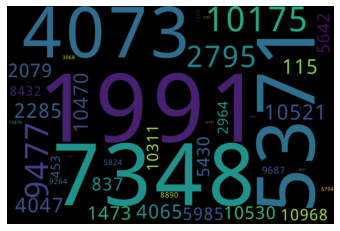

In [244]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=3000,height=2000,
                    random_state=71).generate_from_frequencies(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

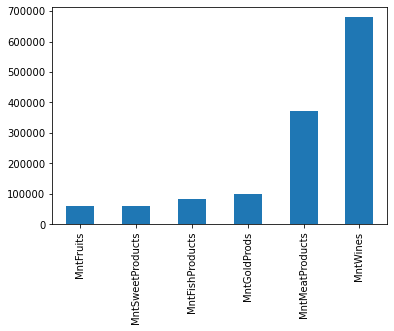

In [245]:
# famous products
data[amount_cols].sum(axis=0).sort_values().plot(kind='bar');

# Section 02: Statistical Analysis

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects).
* Is there a significant relationship between geographical regional and success of a campaign?

In [246]:
num_cols=data.select_dtypes(include='number').columns
cat_cols=[col for col in data.columns if col not in num_cols]

In [247]:
cat_with_purchases=data[cat_cols+['total_purchases']]
num_with_purchases=data[num_cols]

In [268]:
# e.g. cat_with_purchases['Education'].value_counts()
# order [201,54,1127,370,485]

edu_pchs=cat_with_purchases.groupby(['Education'],as_index=False)['total_purchases'].sum()
temp=cat_with_purchases['Education'].value_counts()
temp.index=edu_pchs['Education'].tolist()
edu_pchs['total_purchases']=edu_pchs['total_purchases']/temp.tolist()
display(edu_pchs.style.background_gradient(cmap=plt.get_cmap('binary')))

marry_pchs=cat_with_purchases.groupby(['Marital_Status'],as_index=False)['total_purchases'].sum()
temp=cat_with_purchases['Marital_Status'].value_counts()
temp.index=marry_pchs['Marital_Status'].tolist()
marry_pchs['total_purchases']=marry_pchs['total_purchases']/temp.tolist()
display(marry_pchs.style.background_gradient(cmap=plt.get_cmap('binary')))

country_pchs=cat_with_purchases.groupby(['Country'],as_index=False)['total_purchases'].sum()
temp=cat_with_purchases['Country'].value_counts()
temp.index=country_pchs['Country'].tolist()
country_pchs['total_purchases']=country_pchs['total_purchases']/temp.tolist()
display(country_pchs.style.background_gradient(cmap=plt.get_cmap('binary')))

,Education,total_purchases
0,2n Cycle,2.477374
1,Basic,0.781443
2,Graduation,45.659459
3,Master,27.477612
4,PhD,142.185185


,Marital_Status,total_purchases
0,Absurd,0.045139
1,Alone,0.069085
2,Divorced,7.367432
3,Married,55.939394
4,Single,88.740260
5,Together,2859.666667
6,Widow,643.000000
7,YOLO,19.000000


,Country,total_purchases
0,AUS,2.115174
1,CA,12.205357
2,GER,6.671642
3,IND,13.081250
4,ME,0.401361
5,SA,42.608333
6,SP,147.128440
7,US,587.000000
